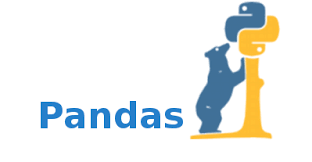

# 피벗 테이블이란?
---

피벗(Pivot) 테이블이란 많은 양의 데이터에서 필요한 자료만을 뽑아 새롭게 표를 작성해 주는 기능입니다.
피벗 테이블을 사용하면 사용자 임의대로 데이터를 정렬하고 필터링 할 수 있씁니다.

피벗 테이블을 일상에서 쉽게 접할 수 있는 방법은 바로 `엑셀`입니다.

엑셀에서는 PIVOT 기능을 이용하여 다양항 데이터에 대한 요약 및 필터링을 지원합니다.

PANDAS 에서도 마찬가지로 이러한 피벗 관련 함수들을 제공하는데 이번 글에서 어떤 피벗 관련 함수들이 존재하고, 그 사용법은 어떠한지에 대해 알아보겠습니다.

# data.pivot()
---

먼저 data.pivot() 을 이용한 피벗 테이블 생성 방법입니다.

In [1]:
# 예제를 위한 라이브러리와 데이터 로드

import numpy as np
import pandas as pd
import seaborn as sns

tips = sns.load_dataset('tips')
titanic = sns.load_dataset('titanic')
iris = sns.load_dataset('iris')

In [2]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


예제용 TIPS 데이터를 살펴보겠습니다. TIPS 데이터는 요일별, 성별 등에 따른 식당의 매출액과 tip에 대한 데이터입니다.

이 TIPS 데이터를 이용해 PIVOT TABLE을 생성하고자 한다면 아래와 같이 PIVOT 함수를 사용할 수 있습니다.

**tips.pivot(index=[행 인덱스], columns=[열 인덱스], values=[분석하고자 하는 KEY FIGURE(변수)])**

바로 위 함수 사용 방법을 통해 TIPS 데이터의 피벗테이블을 생성해보겠습니다.

In [20]:
tips.pivot(index='sex', columns='day', values='tip')

ValueError: Index contains duplicate entries, cannot reshape

함수 사용방법에 맞게끔 코드를 작성했음에도 불구하고 위와 같이 오류가 발생하는 이유는 바로 ERROR 메세지에서 나타나듯이 중복된 값이 존재하기 때문입니다.

즉, 현재 원본 데이터는 요일과 성별에 따른 TIP 데이터의 통계량이 아니고 각각의 ROW에 대한 개별 값을 가지기 때문에 PIVOT 테이블로 바로 변환할 수 없는 것입니다.

따라서 GROUPBY 메소드를 통해 TIPS 데이터를 1차적으로 요약해 통계량을 낸 다음 피벗테이블로 변환할 필요가 있습니다.

In [22]:
grp_s_d = tips.groupby(['sex', 'day'])[['tip']].mean() # 성별과 요일에 따른 tip의 평균으로 통계량을 계산
grp_s_d.reset_index(inplace=True)
grp_s_d

,sex,day,tip
0,Male,Thur,2.980333
1,Male,Fri,2.693000
2,Male,Sat,3.083898
3,Male,Sun,3.220345
4,Female,Thur,2.575625
5,Female,Fri,2.781111
6,Female,Sat,2.801786
7,Female,Sun,3.367222


In [23]:
grp_s_d.pivot(index='sex', columns='day', values='tip')

day,Thur,Fri,Sat,Sun
sex,,,,
Male,2.980333,2.693000,3.083898,3.220345
Female,2.575625,2.781111,2.801786,3.367222


이처럼 1차적으로 데이터를 그룹핑 한 다음 PIVOT 함수를 사용하면 원하는 피벗테이블을 생성할 수 있습니다.

# pd.pivot_table()
---

이어서 PANDAS 데이터프레임을 피벗 테이블로 변환할 수 있는 두번째 방법인 pd.pivot_table() 함수에 대해서 알아보겠습니다.

pd.pivot_table() 함수는 앞서 살펴본 data.pivot() 메소드와 매우 유사하게 동작합니다.

다만 차이점으로 aggfunc 라는 옵션을 통해 해당 데이터의 통계량을 바로 계산하는 것이 가능하다는 점입니다.

바로 예시를 통해 어떻게 pivot_table() 함수를 사용할 수 있는지 알아보겠습니다.

In [24]:
pd.pivot_table(data=tips, index='sex', columns='day', values='tip', aggfunc='mean')

day,Thur,Fri,Sat,Sun
sex,,,,
Male,2.980333,2.693000,3.083898,3.220345
Female,2.575625,2.781111,2.801786,3.367222


위 예시를 살펴보면 affgunc 옵션을 제외한 나머지 부분은 pivot() 함수와 동일한 것을 확인할 수 있습니다. 

다만 차이점으로 aggfunc에 mean과 같은 통계 관련 인자를 입력하는 것으로 데이터를 1차적으로 그룹핑 하지 않아도 바로 피벗테이블을 생성할 수 있습니다.

개인적으로 피벗테이블을 생성할 때 주로 사용하는 방법입니다.

# unstack()
---

마지막으로 unstack() 메소드를 이용한 피벗테이블 생성 예시를 살펴보겠습니다.

unstack() 메소드는 본래 중첩된 index를 명시된 level에 따라 index를 하나하나 풀어주는 개념이라고 이해할 수 있습니다. 

간단한 예시를 통해 unstack() 메소드의 동작 방법에 대해선 stack(), unstack() 관련 글을 읽어보시는 것을 추천합니다.

tips 데이터의 sex와 day에 따른 tip의 평균값을 이용해 피벗테이블을 생성하고자 할 때 먼저 아래와 같이 sex, day 컬럼을 중첩된 index로 그룹핑 하는 것이 가능합니다.

In [30]:
for_pv = tips.groupby(['sex', 'day'])[['tip']].mean()
for_pv

tip
sex    day           
Male   Thur  2.980333
       Fri   2.693000
       Sat   3.083898
       Sun   3.220345
Female Thur  2.575625
       Fri   2.781111
       Sat   2.801786
       Sun   3.367222

위의 그룹핑된 데이터프레임의 index를 살펴보겠습니다.

In [31]:
for_pv.index

MultiIndex([(  'Male', 'Thur'),
            (  'Male',  'Fri'),
            (  'Male',  'Sat'),
            (  'Male',  'Sun'),
            ('Female', 'Thur'),
            ('Female',  'Fri'),
            ('Female',  'Sat'),
            ('Female',  'Sun')],
           names=['sex', 'day'])

그룹핑 된 데이터프레임의 인덱스를 확인해보면 위처럼 MultiIndex로 존재하는 것을 확인할 수 있습니다.
여기서 unstack() 메소드를 이용하여 MultiIndex를 풀어준다고 생각하시면 됩니다.

In [36]:
for_pv.unstack(level=1)

tip                              
day         Thur       Fri       Sat       Sun
sex                                           
Male    2.980333  2.693000  3.083898  3.220345
Female  2.575625  2.781111  2.801786  3.367222

위 MultiIndex를 가진 데이터프레임에 unstack() 메소드를 사용한 결과 앞선 예제들과 동일한 피벗테이블이 생성된 것을 확인할 수 있습니다.